In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)

Pandas Version: 1.1.2
Numpy Version: 1.19.2


In [2]:
df = pd.read_csv("../data/weather.csv")

In [3]:
df.describe()

,year,month,day,hour,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
count,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,266.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29443.000000,29251.000000,26867.000000,29512.000000,22844.000000,15072.000000
mean,2015.221531,6.111205,15.617986,11.500321,0.034906,0.035311,0.042020,10.103162,8.749078,6.098258,0.783620,3.571998,3.926338,192.993915,0.728291,8.998252,0.622383,1015.060264
std,0.992854,3.484693,8.787810,6.922200,0.170882,0.098733,0.120915,7.068134,8.393069,6.015707,0.159837,2.101460,2.739338,89.171872,1.442830,2.218405,0.253200,9.627763
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.002300,-12.080000,-19.100000,-15.240000,0.230000,0.000000,0.000000,0.000000,0.000000,0.099000,0.000000,972.100000
25%,2014.000000,3.000000,8.000000,6.000000,0.000000,0.000000,0.004825,4.950000,2.080000,1.580000,0.680000,2.000000,2.060000,114.000000,0.000000,9.595000,0.440000,1009.400000
50%,2015.000000,6.000000,16.000000,12.000000,0.000000,0.000000,0.008250,9.690000,8.320000,6.000000,0.820000,3.190000,3.350000,219.000000,0.000000,10.003000,0.750000,1015.800000
75%,2016.000000,9.000000,23.000000,17.500000,0.000000,0.000000,0.019350,15.110000,15.130000,10.860000,0.910000,4.760000,4.890000,260.000000,1.000000,10.003000,0.750000,1021.400000
max,2017.000000,12.000000,31.000000,23.000000,6.925600,1.000000,1.360700,36.420000,36.650000,23.400000,1.000000,14.470000,25.970000,359.000000,7.000000,16.093000,1.000000,1051.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29567 entries, 0 to 29566
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  29567 non-null  int64  
 1   month                 29567 non-null  int64  
 2   day                   29567 non-null  int64  
 3   hour                  29567 non-null  int64  
 4   precip_intensity      29567 non-null  float64
 5   precip_probability    29567 non-null  float64
 6   precip_type           6856 non-null   object 
 7   precip_accumulation   266 non-null    float64
 8   temperature           29567 non-null  float64
 9   apparent_temperature  29567 non-null  float64
 10  dew_point             29567 non-null  float64
 11  humidity              29567 non-null  float64
 12  wind_speed            29567 non-null  float64
 13  wind_gust             29443 non-null  float64
 14  wind_bearing          29251 non-null  float64
 15  uv_index           

In [5]:
df.sample(5)

,year,month,day,hour,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
19139,2016,3,8,11,0.0000,0.00,NaN,NaN,3.74,0.54,2.18,0.90,3.63,3.63,220.0,2.0,10.003,0.75,NaN
12281,2015,5,27,18,0.0000,0.00,NaN,NaN,14.98,14.98,4.99,0.51,3.32,4.69,268.0,2.0,10.003,0.75,1019.6
3554,2014,5,29,3,0.0000,0.00,NaN,NaN,6.02,4.51,3.08,0.81,2.04,2.04,41.0,0.0,9.988,NaN,1018.5
28875,2017,4,18,4,0.0644,0.14,rain,NaN,3.15,1.68,1.20,0.87,1.61,1.61,31.0,0.0,10.003,0.75,NaN
22325,2016,7,19,6,0.0000,0.00,NaN,NaN,16.01,16.01,12.82,0.81,2.20,2.20,265.0,0.0,10.003,0.75,NaN


In [6]:
df.isna().sum()

year                        0
month                       0
day                         0
hour                        0
precip_intensity            0
precip_probability          0
precip_type             22711
precip_accumulation     29301
temperature                 0
apparent_temperature        0
dew_point                   0
humidity                    0
wind_speed                  0
wind_gust                 124
wind_bearing              316
uv_index                 2700
visibility                 55
cloud_cover              6723
pressure                14495
dtype: int64

In [7]:
stats = pd.DataFrame(df.isnull().sum()).reset_index()
stats.columns = ['column', 'NaN values']
stats['% missing'] = round((stats['NaN values'] / df.shape[0]) * 100, 2)
stats

,column,NaN values,% missing
0,year,0,0.00
1,month,0,0.00
2,day,0,0.00
3,hour,0,0.00
4,precip_intensity,0,0.00
5,precip_probability,0,0.00
6,precip_type,22711,76.81
7,precip_accumulation,29301,99.10
8,temperature,0,0.00
9,apparent_temperature,0,0.00


In [8]:
len(df[df.precip_type.isna() & df.precip_probability != 0.0].index)

0

In [9]:
pd.unique(df.precip_type)

array([nan, 'rain', 'snow'], dtype=object)

In [10]:
# If the type of precipitation is NaN, the probability of precipitation is always 0. We assume that there was no predcipitation and add replace NaN with 'none'.

df.fillna({'precip_type': 'none'}, inplace=True)

In [11]:
# If the probability of precipitation is 0 we also assume that the precipitation accumulation is 0.

target = df.loc[(df['precip_accumulation'].isna()) & (df['precip_type'] == 'none')]
df.loc[target.index,'precip_accumulation'].fillna(0.0, inplace=True)

In [12]:
df.loc[(df['precip_accumulation'].isna()) & (df['precip_type'] != 'none')]

,year,month,day,hour,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
10,2014,1,1,10,0.0519,0.24,rain,NaN,3.75,0.45,2.07,0.89,3.80,3.80,208.0,0.0,10.003,0.75,1010.0
11,2014,1,1,11,0.0679,0.25,rain,NaN,4.68,1.24,2.91,0.88,4.40,4.40,212.0,0.0,10.003,0.75,1010.5
25,2014,1,2,1,0.0180,0.08,rain,NaN,2.83,-1.86,0.81,0.87,5.99,5.99,141.0,0.0,9.988,NaN,NaN
31,2014,1,2,7,0.0325,0.15,rain,NaN,5.13,1.74,3.81,0.91,4.52,4.52,134.0,0.0,10.003,0.75,999.7
32,2014,1,2,8,0.0235,0.08,rain,NaN,5.13,1.76,3.95,0.92,4.46,4.46,137.0,0.0,10.003,0.75,999.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29558,2017,5,16,15,0.3653,0.43,rain,NaN,14.78,14.78,12.69,0.87,2.88,2.88,140.0,4.0,10.003,0.90,NaN
29559,2017,5,16,16,0.0476,0.15,rain,NaN,15.20,15.20,13.21,0.88,1.96,2.14,140.0,4.0,10.003,0.75,NaN
29560,2017,5,16,17,0.3552,0.43,rain,NaN,15.47,15.47,13.65,0.89,1.41,2.32,133.0,2.0,7.629,0.90,NaN
29561,2017,5,16,18,0.0171,0.08,rain,NaN,16.03,16.03,14.16,0.89,2.28,2.28,116.0,1.0,10.003,0.75,NaN


In [13]:
df.interpolate(limit_direction='both', inplace=True)

In [14]:
df.isna().sum()

year                    0
month                   0
day                     0
hour                    0
precip_intensity        0
precip_probability      0
precip_type             0
precip_accumulation     0
temperature             0
apparent_temperature    0
dew_point               0
humidity                0
wind_speed              0
wind_gust               0
wind_bearing            0
uv_index                0
visibility              0
cloud_cover             0
pressure                0
dtype: int64

In [15]:
df.describe()

,year,month,day,hour,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
count,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000
mean,2015.221531,6.111205,15.617986,11.500321,0.034906,0.035311,0.049054,10.103162,8.749078,6.098258,0.783620,3.571998,3.924357,193.017131,0.762353,8.997781,0.568927,1015.155621
std,0.992854,3.484693,8.787810,6.922200,0.170882,0.098733,0.054893,7.068134,8.393069,6.015707,0.159837,2.101460,2.736080,89.208890,1.445420,2.218851,0.270431,9.205041
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.002300,-12.080000,-19.100000,-15.240000,0.230000,0.000000,0.000000,0.000000,0.000000,0.099000,0.000000,972.100000
25%,2014.000000,3.000000,8.000000,6.000000,0.000000,0.000000,0.004339,4.950000,2.080000,1.580000,0.680000,2.000000,2.060000,114.000000,0.000000,9.595000,0.414000,1010.000000
50%,2015.000000,6.000000,16.000000,12.000000,0.000000,0.000000,0.025278,9.690000,8.320000,6.000000,0.820000,3.190000,3.350000,219.000000,0.000000,10.003000,0.750000,1015.687879
75%,2016.000000,9.000000,23.000000,17.500000,0.000000,0.000000,0.083207,15.110000,15.130000,10.860000,0.910000,4.760000,4.890000,260.500000,1.000000,10.003000,0.750000,1021.138492
max,2017.000000,12.000000,31.000000,23.000000,6.925600,1.000000,1.360700,36.420000,36.650000,23.400000,1.000000,14.470000,25.970000,359.000000,7.000000,16.093000,1.000000,1051.400000


<AxesSubplot:xlabel='precip_intensity'>

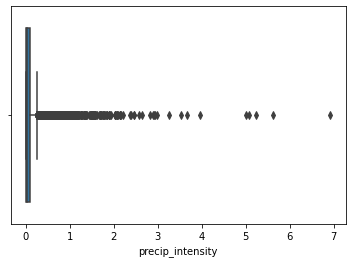

In [16]:
sns.boxplot(x='precip_intensity', data=(df.loc[df['precip_intensity'] > 0.0]))

<AxesSubplot:xlabel='precip_probability'>

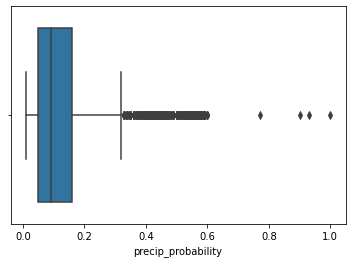

In [17]:
sns.boxplot(x='precip_probability', data=(df.loc[df['precip_probability'] > 0.0]))

<AxesSubplot:xlabel='precip_accumulation'>

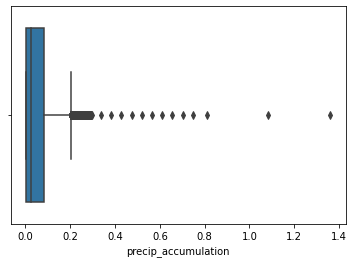

In [18]:
sns.boxplot(x='precip_accumulation', data=(df.loc[df['precip_accumulation'] > 0.0]))

<AxesSubplot:xlabel='temperature'>

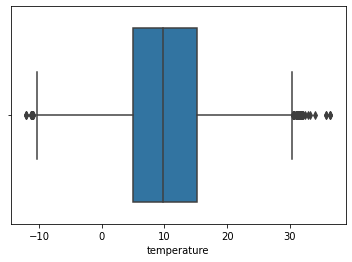

In [19]:
sns.boxplot(x='temperature', data=df)

<AxesSubplot:xlabel='apparent_temperature'>

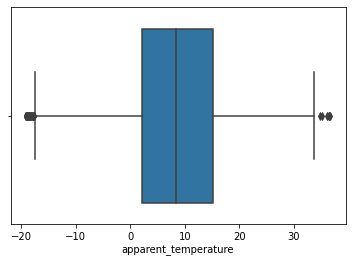

In [20]:
sns.boxplot(x='apparent_temperature', data=df)

In [21]:
df.to_csv("../data/weather_clean.csv", index=False)